When the following expression is positive, the ground station is in view:
$$ r(sin(\phi)cos(2\pi t)cos(i)cos(2\pi \omega t)+sin(\phi)sin(2\pi t)sin(2\pi \omega t)-cos(\phi)sin(i)cos(2\pi\omega t))-1$$

Where t is in units of days, $$r=1+h/R$$ and h is the altitude and R the radius of the Earth, and $$\omega=\frac{T2}{T1}$$ where $T2 = 86400$ (seconds in a day), and $$T1 =2\pi\sqrt{\frac{(h+R)^2}{\mu}}$$ 

Verified in Geogebra: ![ground station](ground_station.PNG)

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from numpy import sin, cos, pi, sqrt, linspace

In [4]:
@np.vectorize
def gs(l, i, h):
    R = 6378e3
    r = 1+h*1e3/R
    N = 100000
    maxd = 10
    t = linspace(0,maxd,N)
    #l = 0.8*np.pi/2
    #i = 0.8
    mu = 3.98e14
    T2 = 86400
    T1 = 2*pi*sqrt((R*r)**3/mu)
    w = T2/T1
    f = r*(sin(l)*cos(2*pi*t)*cos(i)*cos(2*pi*w*t)+sin(l)*sin(2*pi*t)*sin(2*pi*w*t)\
           -cos(l)*sin(i)*cos(2*pi*w*t))-1
    g = np.sum(f>=0)/(float(N))
    return g


In [7]:
ls = linspace(0, pi/2, 50)

In [8]:
lateff = map(lambda l: gs(l, 0, 400), ls)
lateff2 = map(lambda l: gs(l, 0, 300), ls)
lateff3 = map(lambda l: gs(l, 0.2, 300), ls)
lateff4 = map(lambda l: gs(l, 0.5, 300), ls)
lateff7 = map(lambda l: gs(l, 0.8, 300), ls)
lateff71 = map(lambda l: gs(l, 0.8, 400), ls)
lateff8 = map(lambda l: gs(l, 1.1, 300), ls)
lateff9 = map(lambda l: gs(l, 1.3, 300), ls)
lateff10 = map(lambda l: gs(l, 1.4, 300), ls)
lateff11 = map(lambda l: gs(l, 1.5, 300), ls)
lateff5 = map(lambda l: gs(l, np.pi/2, 300), ls)
lateff6 = map(lambda l: gs(l, np.pi/2, 400), ls)

In [9]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120

In [10]:
x,y = np.meshgrid(np.linspace(0, np.pi/2, 50), np.linspace(0, np.pi/2, 50))

In [11]:
z = np.array([gs(ls, elt, 300) for elt in ls])

In [29]:
from mpl_toolkits.mplot3d import Axes3D

In [25]:
%matplotlib notebook

In [26]:
v = (z - z.min().min())
v = v / v.max().max()

<IPython.core.display.Javascript object>


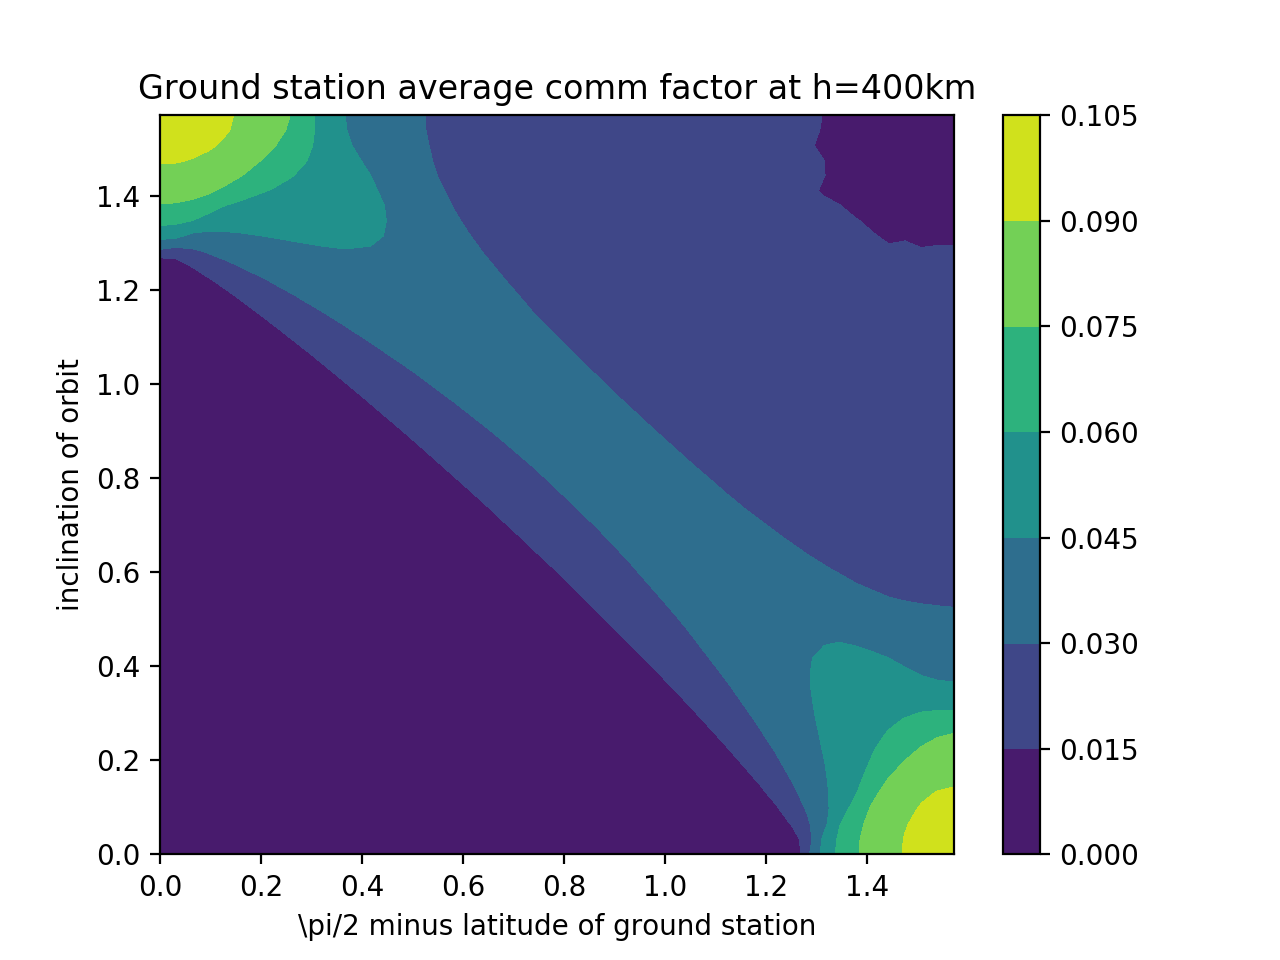

In [38]:
plt.figure()
plt.contourf(x, y, z)
plt.xlabel('\pi/2 minus latitude of ground station')
plt.ylabel('inclination of orbit')
plt.title('Ground station average comm factor at h=400km')
plt.colorbar()

<IPython.core.display.Javascript object>


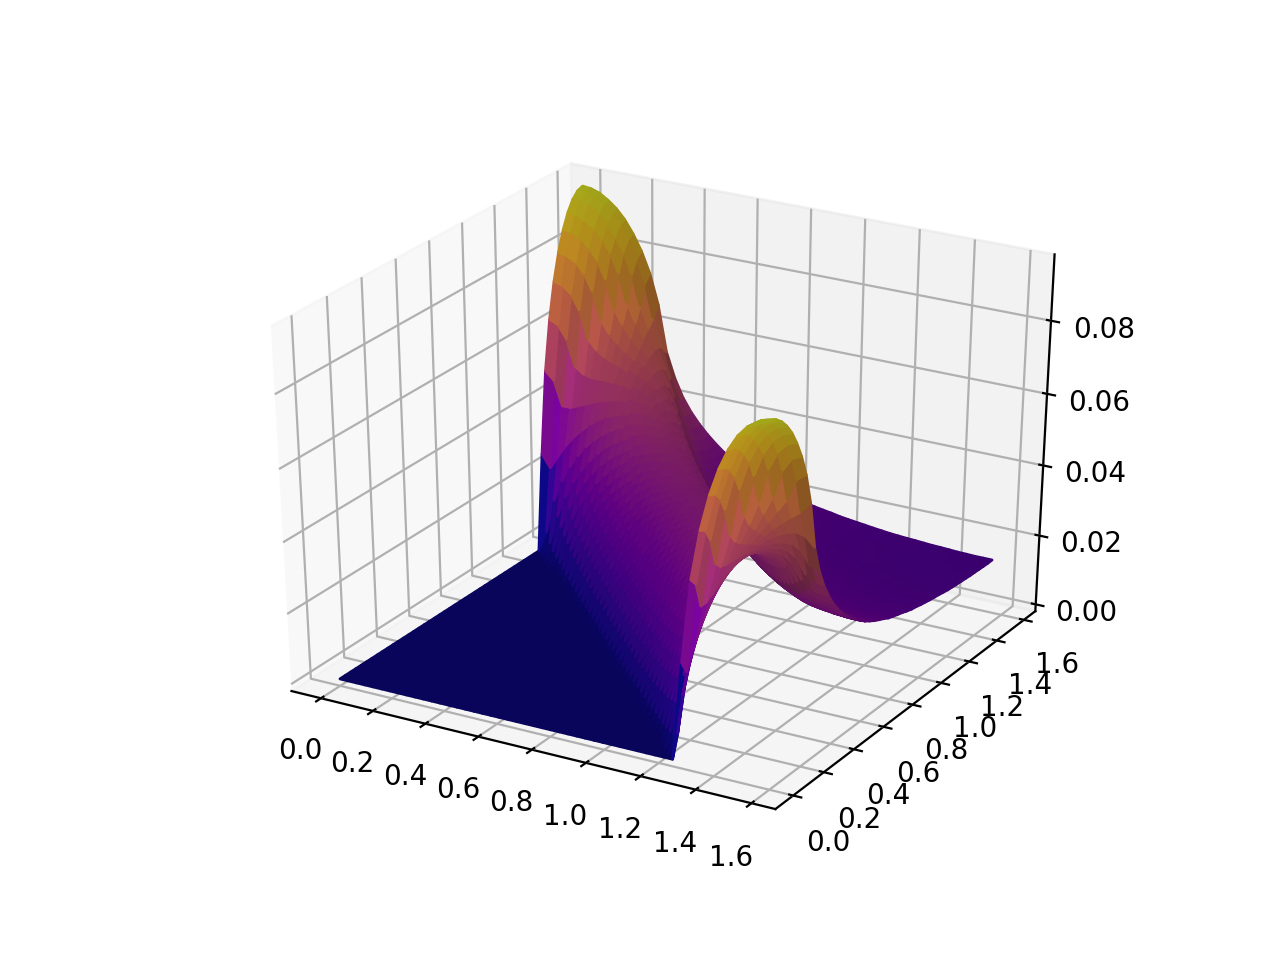

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, facecolors=plt.cm.plasma(v))

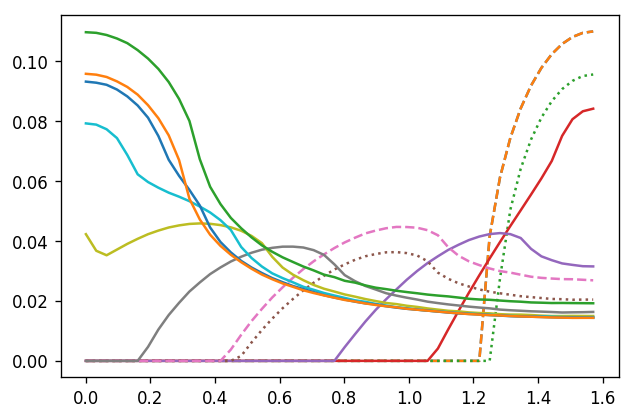

In [193]:
plt.plot(ls, lateff, '--')
plt.plot(ls, lateff2, ':')
plt.plot(ls, lateff3)
plt.plot(ls, lateff4)
plt.plot(ls, lateff7, ':')
plt.plot(ls, lateff71, '--')
plt.plot(ls, lateff8)
plt.plot(ls, lateff9)
plt.plot(ls, lateff10)
plt.plot(ls, lateff11)
plt.plot(ls, lateff5)
plt.plot(ls, lateff6)
plt.show()